In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler    
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # suppress future warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# Exploratory Data Analysis

In [6]:
os = pd.read_csv('online_shoppers_intention.csv')

os.loc[os['Revenue']=='FALSE','Revenue'] = 0  
os.loc[os['Revenue']=='TRUE','Revenue'] = 1

os.loc[os['Weekend']=='FALSE','Weekend'] = 0  
os.loc[os['Weekend']=='TRUE','Weekend'] = 1

os = os.astype({'Revenue': 'int64', 'Weekend': 'int64'})  #converts the data type from string to int 

os.dtypes
os.Month = os.Month.replace(
    {'Jan': '1',
    'Feb': '2', 
    'Mar': '3', 
    'Apr': '4',
    'May': '5', 
    'June': '6', 
    'Jul': '7', 
    'Aug': '8', 
    'Sep': '9', 
    'Oct': '10', 
    'Nov': '11', 
    'Dec': '12',
    }).astype(int)





  # get numbers(codes) and corresponding categories(unique)

    
display(os.shape, os.head(), os.describe()) 


(12330, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


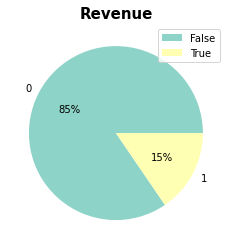

In [7]:
revenue_counts = os['Revenue'].value_counts()

labels = revenue_counts.index
sizes = revenue_counts.values

# Specify the colors for the pie chart
colors = ['#8dd3c7', '#ffffb3']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Revenue', fontsize=15, fontweight='bold')

legend_labels = ['False', 'True']
plt.legend(legend_labels, loc='upper right')

plt.show()

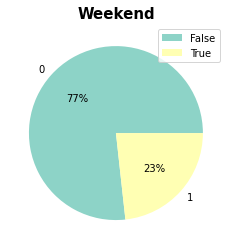

In [8]:
#More in weekdays instead of weekends
revenue_counts = os['Weekend'].value_counts()

labels = revenue_counts.index
sizes = revenue_counts.values

# Specify the colors for the pie chart
colors = ['#8dd3c7', '#ffffb3']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Weekend', fontsize=15, fontweight='bold')
legend_labels = ['False', 'True']
plt.legend(legend_labels, loc='upper right')

plt.show()

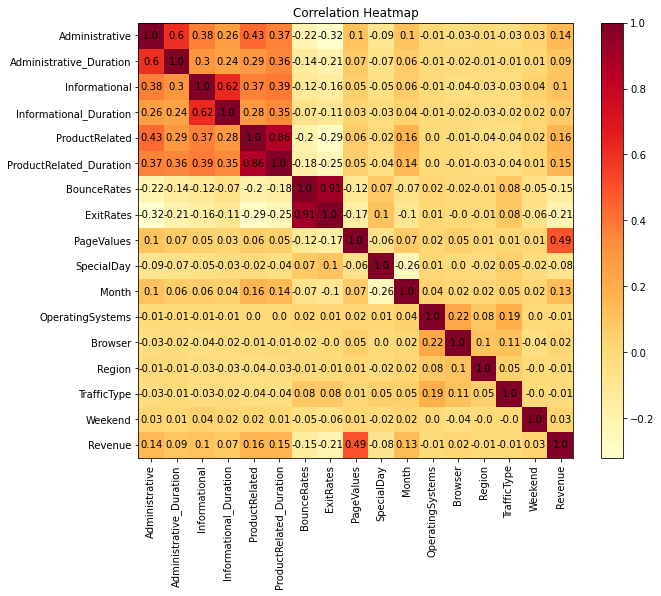

In [9]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Compute the correlation matrix
corr_matrix = os.corr().round(decimals=2)

# Create a heatmap with a different color scheme ('YlOrRd' for yellow-orange-red)
im = ax.imshow(corr_matrix, cmap='YlOrRd')

# Add text annotations to each cell
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, corr_matrix.iloc[i, j],
                       ha='center', va='center', color='black')

# Set ticks and labels for x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotate x-axis tick labels if needed
plt.xticks(rotation=90)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()

## Analysing HeatMap

Bounce rates and exit rates seems to be positively corelating but there is revenue and page values are positively corelated.

Most of the variables are not correlated. 

Browsers, traffic type and operating systems are also slightly corelated.

All the pages and their (Duartions) are corelated and all the three pages.

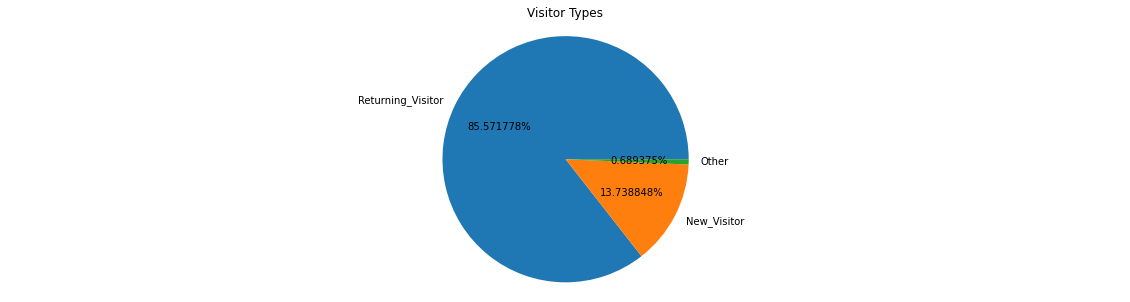

In [10]:
visitor_counts = os['VisitorType'].value_counts()

visitor_types = visitor_counts.index
visitor_counts = visitor_counts.values

plt.figure(figsize=(20, 5))
plt.pie(visitor_counts, labels=visitor_types, autopct='%0f%%')
plt.title('Visitor Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64


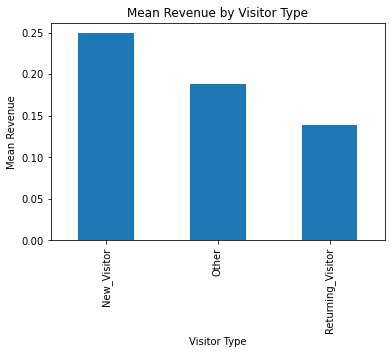

In [11]:
#The majority of sessions are returning users, but the percentage of sessions with a purchase is noticeably higher for new users.
mean_revenue_by_visitor_type = os.groupby('VisitorType')['Revenue'].mean()
print(mean_revenue_by_visitor_type)
mean_revenue_by_visitor_type.plot(kind='bar')
plt.xlabel('Visitor Type')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Visitor Type')
plt.show()

<AxesSubplot:xlabel='TrafficType', ylabel='mean Revenue'>

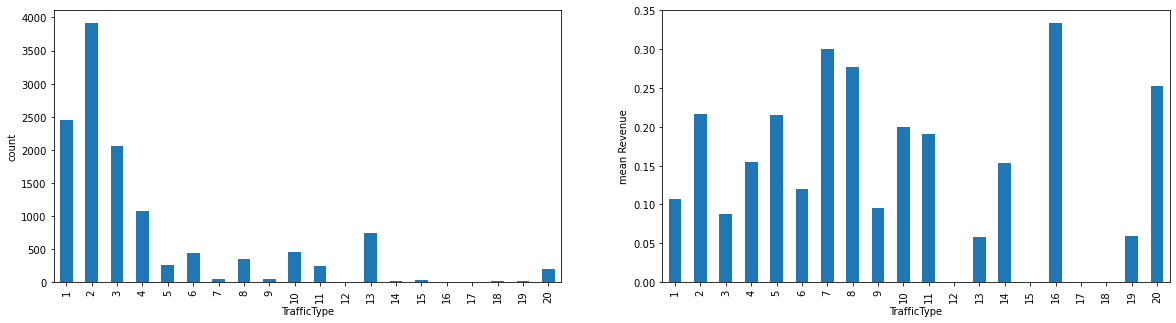

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
TrafficType_to_Revenue = pd.DataFrame(os, columns=['TrafficType', 'Revenue'])
TrafficType_to_Revenue.groupby('TrafficType').count().plot(
    kind='bar', ax=axes[0], ylabel='count', legend=False)
TrafficType_to_Revenue.groupby('TrafficType').mean().plot(
    kind='bar', ax=axes[1], ylabel='mean Revenue', legend=False)

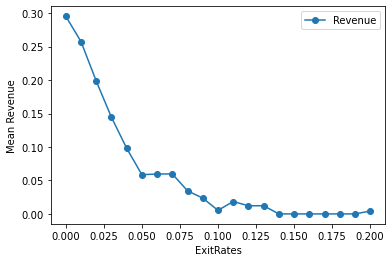

In [53]:
ExitRates_to_Revenue = pd.DataFrame(os, columns=['Revenue', 'ExitRates'])
ExitRates_to_Revenue.ExitRates = ExitRates_to_Revenue.ExitRates.round(decimals=2)
ExitRates_to_Revenue.groupby('ExitRates').mean().plot(marker='o', xlabel='ExitRates', ylabel='Mean Revenue')

plt.show()
#The exit rates shows that people will not purchase since they exited and as the exit rates incraeses , the reveune also decreases.

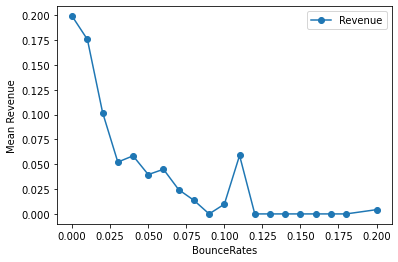

In [54]:
BounceR_to_Revenue = pd.DataFrame(os, columns=['Revenue', 'BounceRates'])
BounceR_to_Revenue.BounceRates = BounceR_to_Revenue.BounceRates.round(decimals=2)
BounceR_to_Revenue.groupby('BounceRates').mean().plot(marker='o', xlabel='BounceRates', ylabel='Mean Revenue')

plt.show()

#The bounce rates and exit rates have fairly similar kind of impact on the revnue, but bounce rates shows more reveune gain than exit rates.

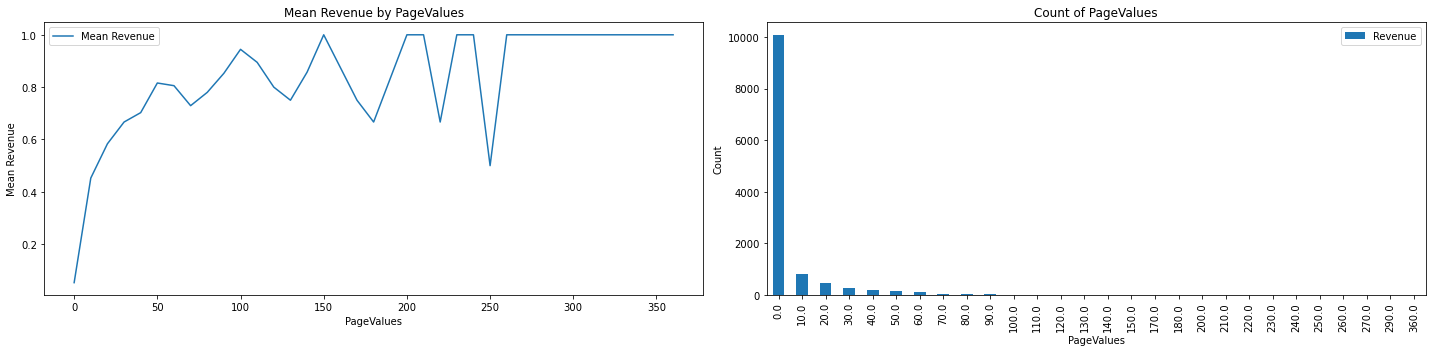

In [55]:
PageValues_to_revenue = pd.DataFrame(os, columns=['Revenue', 'PageValues'])
PageValues_to_revenue.PageValues = PageValues_to_revenue.PageValues.round(decimals=-1)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot mean revenue
PageValues_to_revenue.rename(columns={'Revenue': 'Mean Revenue'}).groupby('PageValues').mean().plot(ax=axes[0])
axes[0].set_xlabel('PageValues')
axes[0].set_ylabel('Mean Revenue')
axes[0].set_title('Mean Revenue by PageValues')

# Plot page values
PageValues_to_revenue.groupby('PageValues').count().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('PageValues')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of PageValues')


plt.tight_layout()
plt.show()

#Page values and reveune generation seems to have a higher coorelation, more higher the revenue, higher the pagevalue.

<AxesSubplot:xlabel='OperatingSystems', ylabel='mean Revenue'>

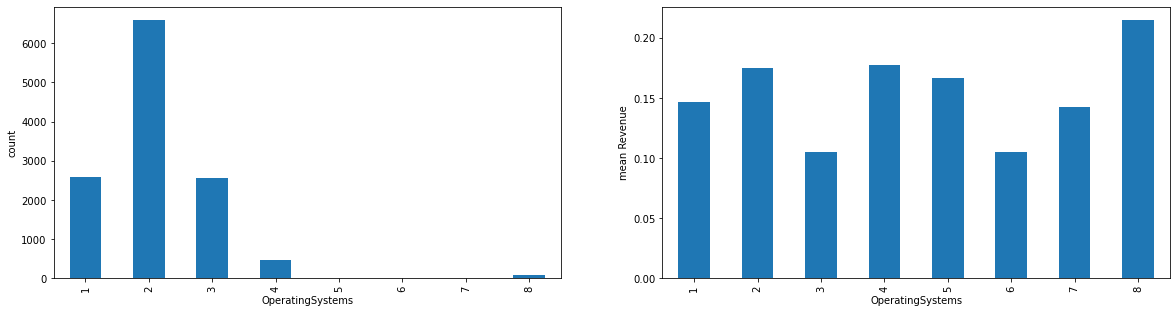

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
pd.DataFrame(os, columns=['OperatingSystems', 'Revenue']).groupby(
    'OperatingSystems').count().plot(kind='bar', ax=axes[0], ylabel='count', legend=False)
pd.DataFrame(os, columns=['OperatingSystems', 'Revenue']).groupby(
    'OperatingSystems').mean().plot(kind='bar', ax=axes[1], ylabel='mean Revenue', legend=False)

#In the graph we can see that most customers uses three types of operating system but the revenue seems to be fairly similar and not affected by the type of operating sysems.
#the company can push more better experience for the three operating system users, so that they will genrate more revenue.

<Figure size 1440x360 with 0 Axes>

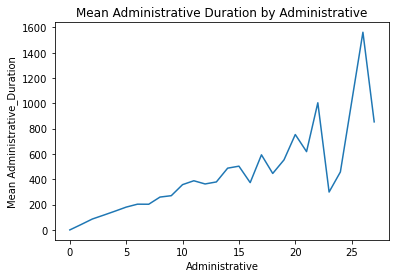

<Figure size 1440x360 with 0 Axes>

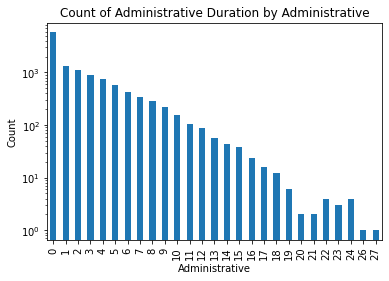

<Figure size 1440x360 with 0 Axes>

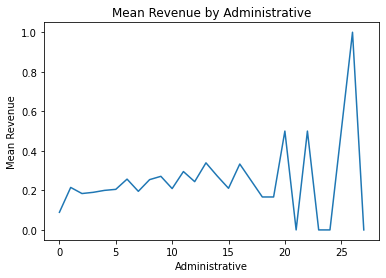

In [57]:
# Mean Administrative Duration
plt.figure(figsize=(20, 5))
pd.DataFrame(os, columns=['Administrative', 'Administrative_Duration']).groupby('Administrative').mean().plot(legend=False)
plt.ylabel('Mean Administrative_Duration')
plt.xlabel('Administrative')
plt.title('Mean Administrative Duration by Administrative')
plt.show()

# Count of Administrative Duration
plt.figure(figsize=(20, 5))
pd.DataFrame(os, columns=['Administrative', 'Administrative_Duration']).groupby('Administrative').count().plot(kind='bar', legend=False, logy=True)
plt.ylabel('Count')
plt.xlabel('Administrative')
plt.title('Count of Administrative Duration by Administrative')
plt.show()

# Mean Revenue
plt.figure(figsize=(20, 5))
pd.DataFrame(os, columns=['Administrative', 'Revenue']).groupby('Administrative').mean().plot(legend=False)
plt.ylabel('Mean Revenue')
plt.xlabel('Administrative')
plt.title('Mean Revenue by Administrative')
plt.show()

<Figure size 1440x360 with 0 Axes>

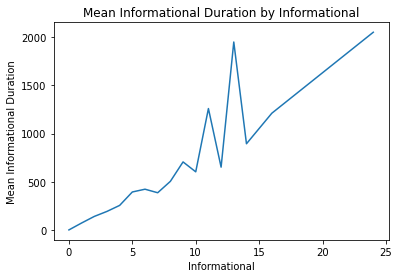

<Figure size 1440x360 with 0 Axes>

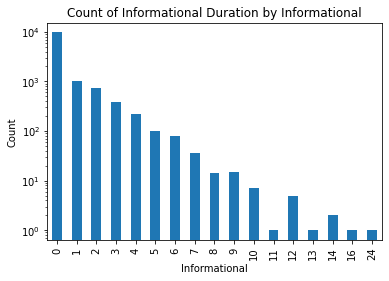

<Figure size 1440x360 with 0 Axes>

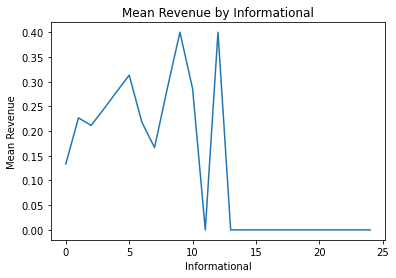

In [58]:
# Mean Informational Duration
plt.figure(figsize=(20, 5))
pd.DataFrame(os, columns=['Informational', 'Informational_Duration']).groupby('Informational').mean().plot(legend=False)
plt.ylabel('Mean Informational Duration')
plt.xlabel('Informational')
plt.title('Mean Informational Duration by Informational')
plt.show()

# Count of Informational Duration
plt.figure(figsize=(20, 5))
pd.DataFrame(os, columns=['Informational', 'Informational_Duration']).groupby('Informational').count().plot(kind='bar', legend=False, logy=True)
plt.ylabel('Count')
plt.xlabel('Informational')
plt.title('Count of Informational Duration by Informational')
plt.show()

# Mean Revenue
plt.figure(figsize=(20, 5))
pd.DataFrame(os, columns=['Informational', 'Revenue']).groupby('Informational').mean().plot(legend=False)
plt.ylabel('Mean Revenue')
plt.xlabel('Informational')
plt.title('Mean Revenue by Informational')
plt.show()

<AxesSubplot:xlabel='ProductRelated(<200)', ylabel='mean Revenue'>

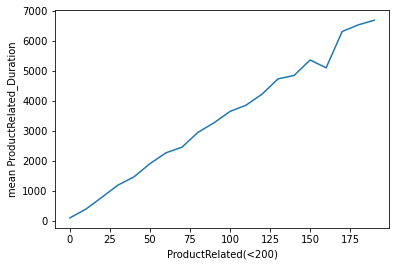

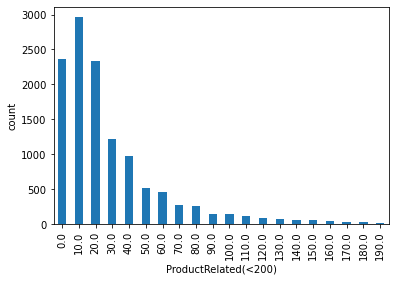

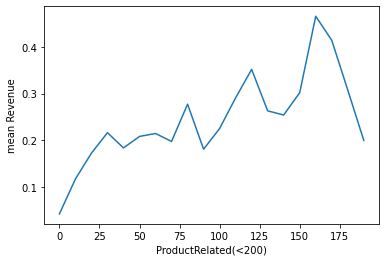

In [59]:
# ProductRelated Duration
ProductRelated_to_Duration = pd.DataFrame(os, columns=['ProductRelated', 'ProductRelated_Duration'])
ProductRelated_to_Duration.ProductRelated = ProductRelated_to_Duration.ProductRelated.round(decimals=-1)
ProductRelated_to_Duration.mask(ProductRelated_to_Duration.ProductRelated >= 200).groupby('ProductRelated').mean().plot(legend=False, ylabel='mean ProductRelated_Duration', xlabel='ProductRelated(<200)')

# Count of ProductRelated Duration
ProductRelated_to_Duration.mask(ProductRelated_to_Duration.ProductRelated >= 200).groupby('ProductRelated').count().plot(legend=False, ylabel='count', xlabel='ProductRelated(<200)', kind='bar')

# Mean Revenue
ProductRelated_to_Revenue = pd.DataFrame(os, columns=['ProductRelated', 'Revenue'])
ProductRelated_to_Revenue.ProductRelated = ProductRelated_to_Revenue.ProductRelated.round(decimals=-1)
ProductRelated_to_Revenue.mask(ProductRelated_to_Revenue.ProductRelated >= 200).groupby('ProductRelated').mean().plot(legend=False, ylabel='mean Revenue', xlabel='ProductRelated(<200)')

<AxesSubplot:xlabel='Browser', ylabel='mean Revenue'>

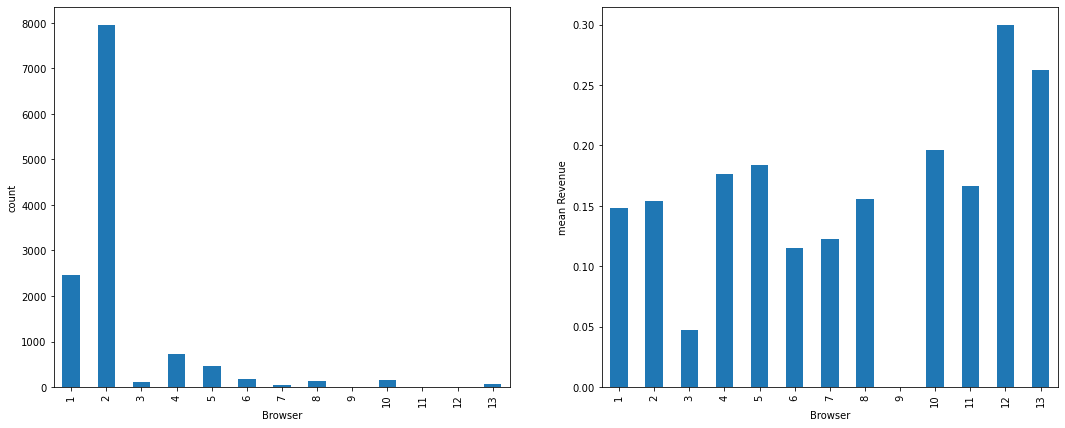

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
Browser_to_Revenue = pd.DataFrame(os, columns=['Browser', 'Revenue'])
Browser_to_Revenue.groupby('Browser').count().plot(
    kind='bar', ax=axes[0], ylabel='count', legend=False)
Browser_to_Revenue.groupby('Browser').mean().plot(
    kind='bar', ax=axes[1], ylabel='mean Revenue', legend=False)

#no significant impact

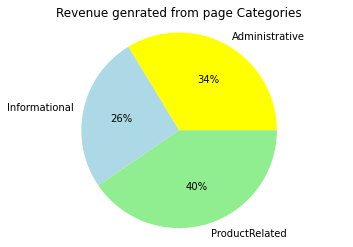

In [70]:
admin_duration = pd.DataFrame(os, columns=['Administrative', 'Revenue'])
admin_mean_Revenue = admin_duration.groupby('Administrative')['Revenue'].mean()

# Mean Informational Duration
info_duration = pd.DataFrame(os, columns=['Informational', 'Revenue'])
info_mean_Revenue = info_duration.groupby('Informational')['Revenue'].mean()

# Mean ProductRelated Duration
prod_duration = pd.DataFrame(os, columns=['ProductRelated', 'Revenue'])
prod_mean_Revenue = prod_duration.groupby('ProductRelated')['Revenue'].mean()



# Create a pie chart
labels = ['Administrative', 'Informational', 'ProductRelated']
sizes = [admin_mean_Revenue.mean(), info_mean_Revenue.mean(), prod_mean_Revenue.mean()]
colors = ['yellow', 'lightblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%', normalize = True)
plt.axis('equal')
plt.title('Revenue genrated from page Categories')
plt.show()

#Product related page still plays a larger part in generating the revenue.

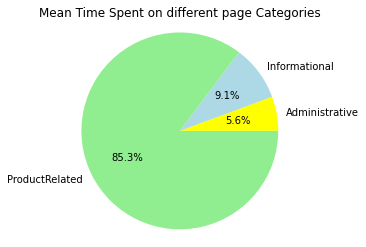

In [71]:
admin_duration = pd.DataFrame(os, columns=['Administrative', 'Administrative_Duration'])
admin_mean_duration = admin_duration.groupby('Administrative')['Administrative_Duration'].mean()

# Mean Informational Duration
info_duration = pd.DataFrame(os, columns=['Informational', 'Informational_Duration'])
info_mean_duration = info_duration.groupby('Informational')['Informational_Duration'].mean()

# Mean ProductRelated Duration
prod_duration = pd.DataFrame(os, columns=['ProductRelated', 'ProductRelated_Duration'])
prod_mean_duration = prod_duration.groupby('ProductRelated')['ProductRelated_Duration'].mean()

# Create a pie chart
labels = ['Administrative', 'Informational', 'ProductRelated']
sizes = [admin_mean_duration.mean(), info_mean_duration.mean(), prod_mean_duration.mean()]
colors = ['yellow', 'lightblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', normalize = True)
plt.axis('equal')
plt.title('Mean Time Spent on different page Categories')
plt.show()


<Figure size 720x432 with 0 Axes>

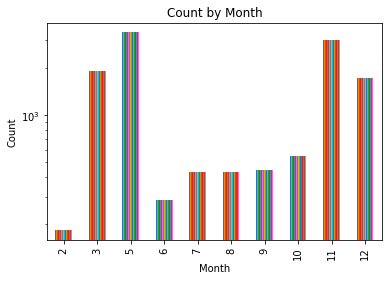

In [72]:
plt.figure(figsize=(10, 6))
os.groupby('Month').count().plot(kind='bar', legend=False, logy=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count by Month')

plt.show()
#Number of vistors according to the month, no data for January and April(no reason found)

In [73]:

# Counting the number of records in SpecialDays by month
special_days_counts = os[os.SpecialDay == 0][['Month', 'Revenue']].groupby('Month').count().T
print('Number of records in SpecialDays:')
print(special_days_counts)

# Counting the number of Revenue=1 in SpecialDays by month
special_days_revenue_counts = os[(os.SpecialDay == 0) & (os.Revenue == 1)][['Month', 'Revenue']].groupby('Month').count().T
print('Number of Revenue=1 in SpecialDays:')
print(special_days_revenue_counts)

# We can assume that month of March,May,November, and December had more special days, whic is reflected in the previous graph that shows the traffic rate increased in those months
#But the revenue genrated within the special days could be seen highly in the month of Novemeber only.

Number of records in SpecialDays:
Month     2     3     5    6    7    8    9    10    11    12
Revenue  105  1907  2192  288  432  433  448  549  2998  1727
Number of Revenue=1 in SpecialDays:
Month    2    3    5   6   7   8   9    10   11   12
Revenue   1  192  290  29  66  76  86  115  760  216


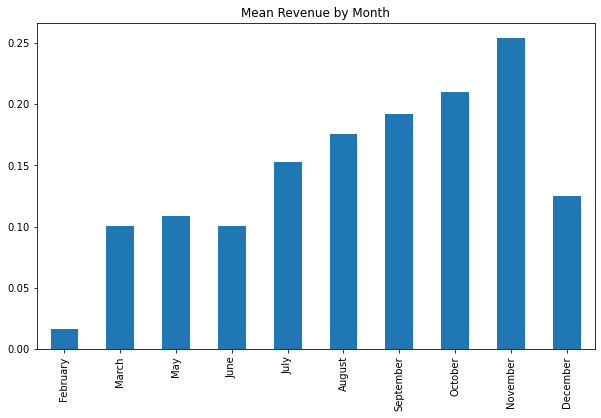

In [74]:
import calendar
months_to_revenue = pd.DataFrame(os, columns=['Month', 'Revenue'])
months_to_revenue = months_to_revenue.groupby('Month').mean().reset_index()
months_to_revenue['month_name'] = months_to_revenue['Month'].map(lambda x: calendar.month_name[x])
fig, ax = plt.subplots(figsize=(10, 6))
months_to_revenue.plot(kind='bar', x='month_name', y='Revenue', xlabel='', title='Mean Revenue by Month', legend=False, ax=ax)
plt.show()
#Number of purchase made within different months,

Text(0.5, 1.0, 'Mean Revenue by Weekend')

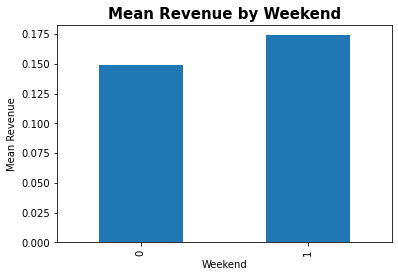

In [75]:
TrafficType_to_Weekend = pd.DataFrame(os, columns=['Weekend', 'Revenue'])
TrafficType_to_Weekend.groupby('Weekend').mean().plot(kind='bar', ylabel='Mean Revenue', legend=False)
plt.xlabel('Weekend', fontsize=10)
plt.title('Mean Revenue by Weekend', fontsize=15, fontweight='bold')

# Data Mining

## Data preprocessing

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

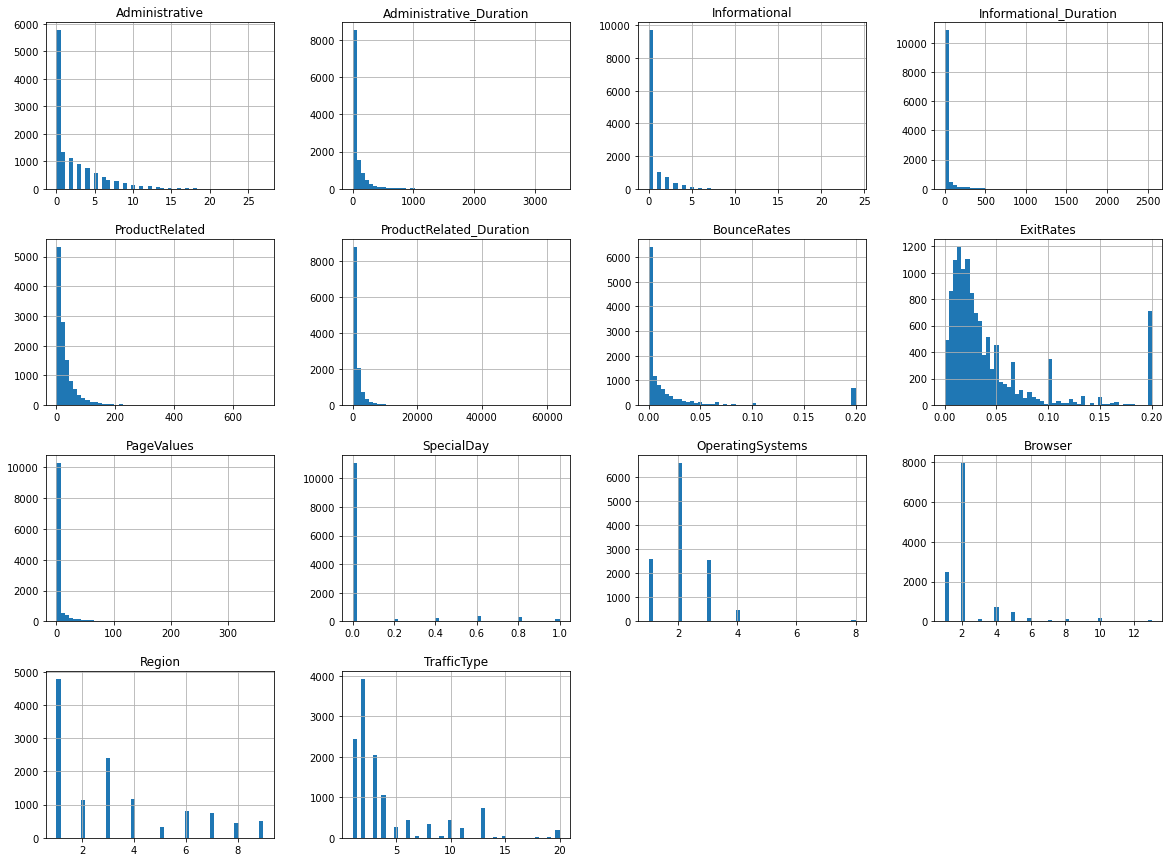

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Observations:

1. Data is not evenly distributed.

In [7]:
# Encode target labels with value between 0 and n_classes-1.
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['TrafficType'] = le.fit_transform(df['TrafficType'])
df['OperatingSystems'] = le.fit_transform(df['OperatingSystems'])
df['Browser'] = le.fit_transform(df['Browser'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])

<AxesSubplot:>

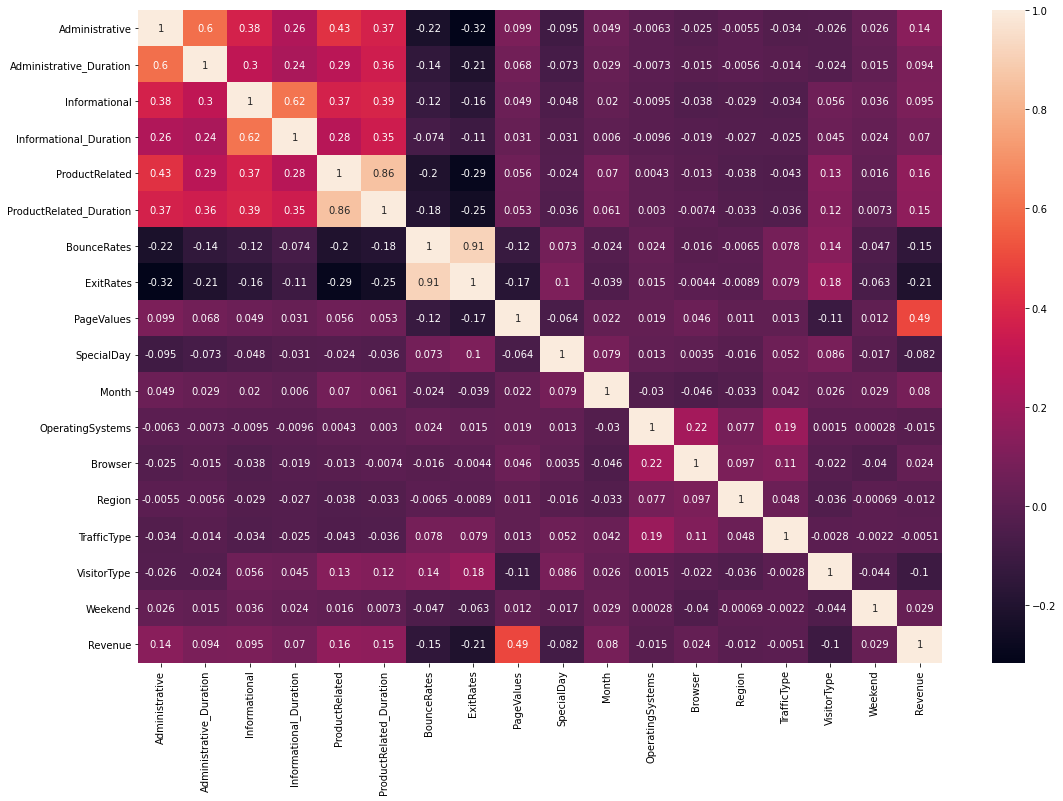

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot = True)

In [9]:
X = df.drop(columns = 'Revenue')
y = df[['Revenue']]

display(X, y.shape)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,0,0,0,0,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,1,1,0,1,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,3,0,8,2,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2,1,1,3,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,2,2,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,3,5,0,0,2,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,2,1,0,7,2,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,2,1,0,12,2,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,1,1,2,10,2,0


(12330, 1)

**train_test_split()** is applied to split the data into training data set and test set.

**StandardScaler() is applied.** 

Standardise the features by subtracting the mean and dividing by the standard deviation, making it less sensitive to outliers.

- Decision Tree Model uses X_train, X_test, y_train, y_test for modelling.
- Logistic Regression Model and KNN Model uses X_train_scaled, X_test_scaled, y_train, y_test for modelling instead.

Logistic Regression Model and KNN Model are sensitive to feature scaling & outliers as they use gradient descent optimization and distance-based algorithms respectively. 

Therefore, I use feature scaling to ensure that all features have a similar impact on the models. 

On the other hand, Decision Tree model are not affected by outliers and feature scaling.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   

X_test_scaled = scaler.transform(X_test)

# Display the mean, standard deviation of train and test features
display(X_train_scaled.mean(),X_train_scaled.std(), X_test_scaled.mean(), X_test_scaled.std())

8.95884234773549e-18

1.0

0.010734098685660194

1.0327168364801749

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

display(X_train_scaled.head(), X_test_scaled.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.699615,-0.465158,-0.397205,-0.252976,-0.601617,-0.609623,0.391685,0.159557,-0.314838,-0.3047,-1.750738,0.978651,-0.208010,-0.892301,-0.515315,-2.493038,-0.545440
1,-0.699615,-0.465158,-0.397205,-0.252976,-0.646686,-0.550600,-0.454537,0.509468,-0.314838,-0.3047,-0.065554,0.978651,-0.208010,2.013749,-0.763872,0.407078,-0.545440
2,-0.699615,-0.465158,0.383546,0.720154,-0.534014,-0.410585,-0.454537,-0.590251,-0.314838,-0.3047,-0.065554,0.978651,-0.208010,0.353149,2.467373,0.407078,1.833383
3,-0.699615,-0.465158,-0.397205,-0.252976,-0.646686,-0.653970,3.776574,3.308752,-0.314838,-0.3047,-0.065554,-1.237178,3.285991,-0.477151,-0.763872,0.407078,-0.545440
4,-0.699615,-0.465158,-0.397205,-0.252976,-0.624152,-0.646313,1.661019,2.259020,-0.314838,-0.3047,-0.065554,0.978651,-0.208010,-0.892301,-0.763872,0.407078,-0.545440


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.211976,0.358157,-0.397205,-0.252976,0.367362,-0.078457,-0.362556,-0.616331,-0.314838,-0.3047,0.777037,-1.237178,3.285991,1.183449,1.721701,0.407078,-0.545440
1,1.123567,2.061937,1.164298,1.483545,1.156066,0.715483,-0.408041,-0.786962,-0.204095,-0.3047,-0.065554,-0.129263,-0.208010,-0.062001,-0.515315,0.407078,-0.545440
2,-0.395752,-0.227552,-0.397205,-0.252976,2.125046,1.703310,-0.439985,-0.620964,-0.131644,-0.3047,0.777037,-0.129263,-0.208010,-0.477151,-0.515315,0.407078,-0.545440
3,-0.091888,0.349491,-0.397205,-0.252976,-0.488945,-0.322165,-0.278241,-0.336149,1.631839,-0.3047,-2.172034,-0.129263,1.538990,1.598599,-0.018200,0.407078,-0.545440
4,4.769931,3.048464,4.287304,5.156742,3.071491,2.052468,-0.314238,-0.606169,0.223989,-0.3047,-2.172034,-0.129263,-0.208010,-0.062001,-0.763872,0.407078,1.833383


**GridSearchCV()** is applied to use cross-validation based on the parameters input to find the best estimators for different Machine Learning Models (DecisionTree, LogisticRegression and KNN).

### Use GridSearchCV on Decision Tree Model

In [13]:
# 17 features to choose from
params = {
    'criterion': ['entropy'],
    'min_samples_leaf': [400,500,600,700,800],
    'max_features': [8,9,10,11,12,13,14],
    'random_state': [5]
}

tree_class = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=tree_class, param_grid = params, cv=5)

In [14]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_features': [8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [400, 500, 600, 700, 800],
                         'random_state': [5]})

In [15]:
print('Best Parameters: {}'.format(grid_search.best_params_))

print('Best cv score: {:.3f}'.format(grid_search.best_score_)) # highest mean test score on validation set (best cross-validated score)

model_tree = grid_search.best_estimator_
display(model_tree)

Best Parameters: {'criterion': 'entropy', 'max_features': 9, 'min_samples_leaf': 700, 'random_state': 5}
Best cv score: 0.892


DecisionTreeClassifier(criterion='entropy', max_features=9,
                       min_samples_leaf=700, random_state=5)

<AxesSubplot:>

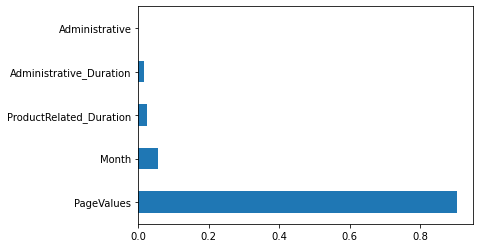

In [16]:
feat_importances = pd.Series(model_tree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [17]:
print('Training performance: {:.3f}'.format(model_tree.score(X_train, y_train)))
print('Generalisation performance: {:.3f}'.format(model_tree.score(X_test, y_test)))

Training performance: 0.891
Generalisation performance: 0.885


In [18]:
model_tree_pred = model_tree.predict(X_test)                   # get predicted labels first

confusion_matrix(y_true = y_test, y_pred = model_tree_pred)    # rows - actual labels; cols - predicted labels 

array([[3022,  102],
       [ 323,  252]], dtype=int64)

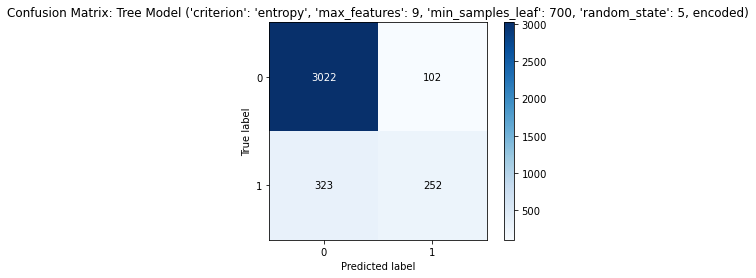

In [19]:
plot_confusion_matrix(y_true = y_test, 
                      y_pred = model_tree_pred, 
#                       cmap = 'BrBG',         #  Choose a prefered color map
                      #normalize = True,     #  Normalize frequency as percentage (of total true instances)   
                      title = "Confusion Matrix: Tree Model ('criterion': 'entropy', 'max_features': 9, 'min_samples_leaf': 700, 'random_state': 5, encoded)"); 

In [20]:
print('Accuracy(Model1): {:.2f}'.format(accuracy_score(y_test, model_tree_pred)))     
print('Precision(Model1): {:.2f}'.format(precision_score(y_test, model_tree_pred))) 
print('Recall(Model1): {:.2f}'.format(recall_score(y_test, model_tree_pred)))
print('F1(Model1): {:.2f}'.format(f1_score(y_test, model_tree_pred)))

Accuracy(Model1): 0.89
Precision(Model1): 0.71
Recall(Model1): 0.44
F1(Model1): 0.54


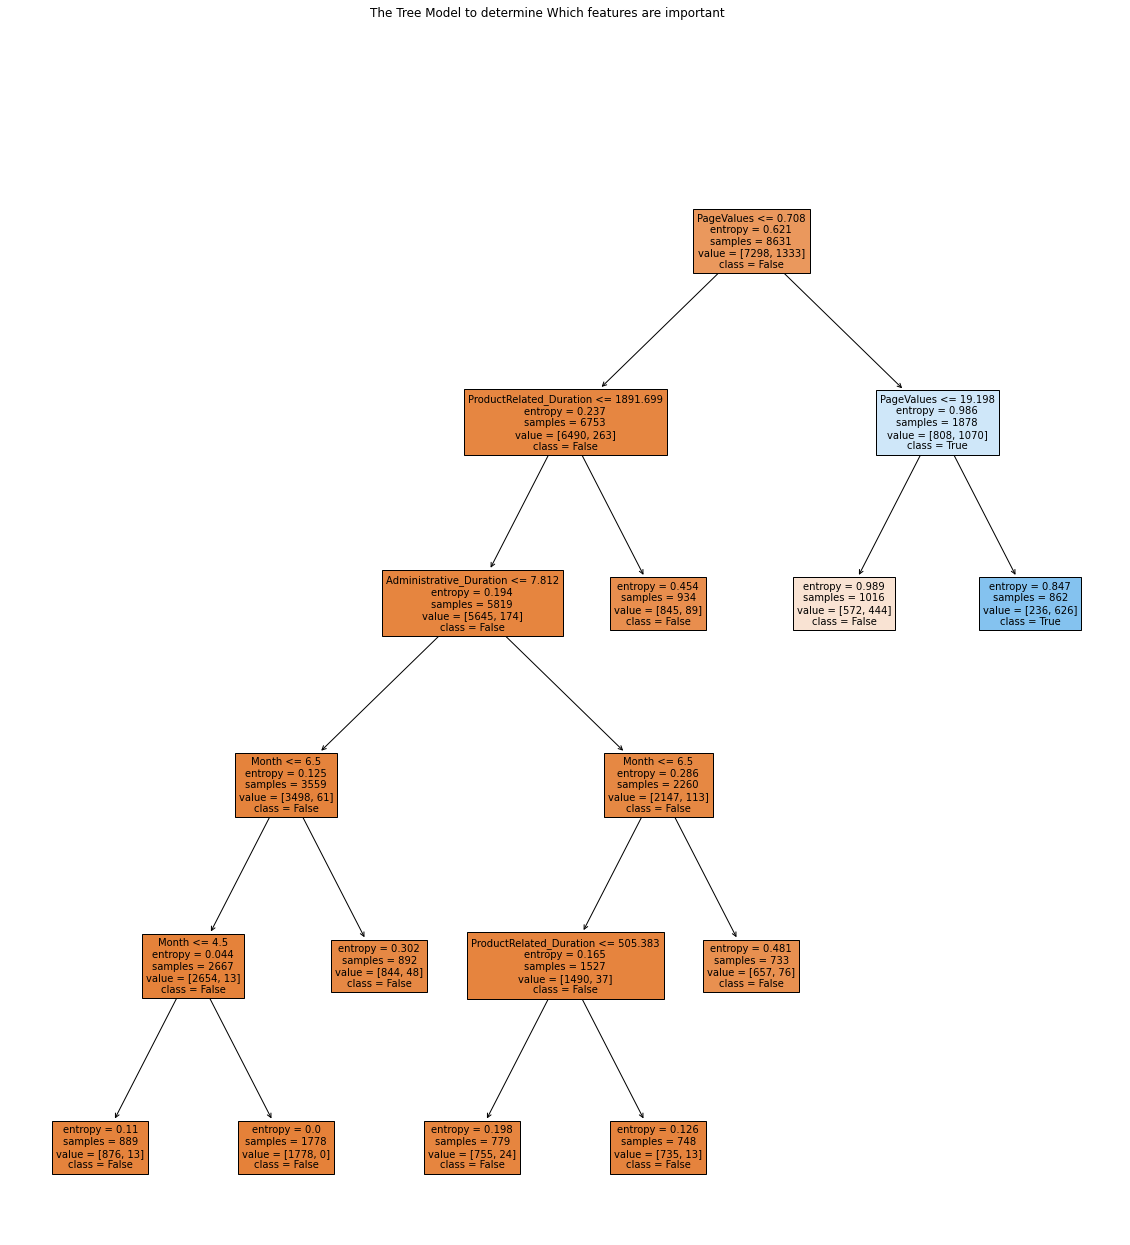

In [21]:
fig = plt.figure(figsize = (20,20))

plot_tree(decision_tree = model_tree,
         feature_names = X_train.columns,
         class_names = ['False', 'True'],
         filled = True,
         fontsize = 10);
                        
fig.suptitle('The Tree Model to determine Which features are important');

### Use GridSearchCV on Logistic Regression Model

In [22]:
# 17 features to choose from
params = {
    'penalty': [None, 'l1', 'l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'random_state': [5]
}

logis_class = LogisticRegression()

grid_search = GridSearchCV(estimator=logis_class, param_grid = params, cv=5)

In [23]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': [None, 'l1', 'l2'], 'random_state': [5]})

In [24]:
print('Best Parameters: {}'.format(grid_search.best_params_))

print('Best cv score: {:.3f}'.format(grid_search.best_score_)) # highest mean test score on validation set (best cross-validated score)

model_Logistic = grid_search.best_estimator_
display(model_Logistic)
display(model_Logistic.intercept_, model_Logistic.coef_, model_Logistic.feature_names_in_)

Best Parameters: {'C': 0.001, 'penalty': None, 'random_state': 5}
Best cv score: 0.886


LogisticRegression(C=0.001, penalty=None, random_state=5)

array([-2.25343107])

array([[-4.86534444e-02, -1.04054000e-02,  7.13478850e-02,
        -4.52704205e-04,  8.74404543e-02,  1.63608773e-01,
        -1.30492005e-01, -7.89645677e-01,  1.49080564e+00,
        -2.34221139e-01,  2.64153526e-01, -1.38749430e-01,
         5.09311305e-02, -4.95787374e-02,  3.53132004e-02,
        -1.06261583e-01,  3.29204882e-02]])

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend'], dtype=object)

In [25]:
print('Model Logistic Regression Training performance: {:.3f}'.format(model_Logistic.score(X_train_scaled, y_train)))
print('Model Logistic Regression Generalisation performance: {:.3f}'.format(model_Logistic.score(X_test_scaled, y_test)))

Model Logistic Regression Training performance: 0.887
Model Logistic Regression Generalisation performance: 0.881


In [26]:
model_Logistic_pred = model_Logistic.predict(X_test_scaled)                   # get predicted labels first

confusion_matrix(y_true = y_test, y_pred = model_Logistic_pred)    # rows - actual labels; cols - predicted labels 

array([[3056,   68],
       [ 374,  201]], dtype=int64)

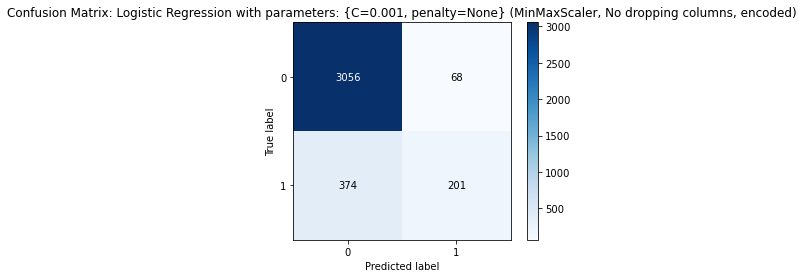

In [27]:
plot_confusion_matrix(y_true = y_test, 
                      y_pred = model_Logistic_pred, 
#                       cmap = 'BrBG',         #  Choose a prefered color map
                      #normalize = True,     #  Normalize frequency as percentage (of total true instances)   
                      title = "Confusion Matrix: Logistic Regression with parameters: {C=0.001, penalty=None} (MinMaxScaler, No dropping columns, encoded)"); 

In [28]:
print('Accuracy(Model2): {:.2f}'.format(accuracy_score(y_test, model_Logistic_pred)))     
print('Precision(Model2): {:.2f}'.format(precision_score(y_test, model_Logistic_pred))) 
print('Recall(Model2): {:.2f}'.format(recall_score(y_test, model_Logistic_pred)))
print('F1(Model2): {:.2f}'.format(f1_score(y_test, model_Logistic_pred)))

Accuracy(Model2): 0.88
Precision(Model2): 0.75
Recall(Model2): 0.35
F1(Model2): 0.48


### Use GridSearchCV on K-Number Neighbors Model

In [29]:
knn = KNeighborsClassifier()

k_range = {'n_neighbors': np.arange(1,101)}   # K Number of Neighbors size from 1 to 100.       

grid_search = GridSearchCV(estimator = knn, param_grid = k_range, cv = 5)   # cv = 5 means 5 folds

grid_search.fit(X_train_scaled, y_train)                    # Grid Search on scaled Train data (with 5-cv)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [30]:
model_KNN = grid_search.best_estimator_
display(model_KNN)

# k value that returns highest mean cv score on validation sets during 5-cv 
print("Best Params: {}".format(grid_search.best_params_)) 

# Best generalization: mean cv score of the best k  
print("Mean cv score of the best k: {:.3f}".format(grid_search.best_score_)) 

KNeighborsClassifier(n_neighbors=11)

Best Params: {'n_neighbors': 11}
Mean cv score of the best k: 0.880


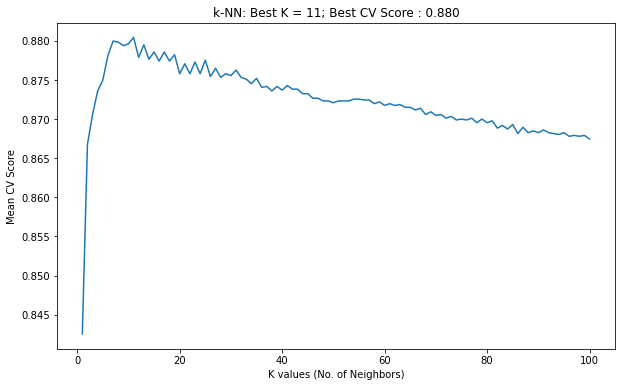

In [31]:
scores = grid_search.cv_results_['mean_test_score']        # Get the mean cv scores for each k   
best_score =  grid_search.best_score_                      # max cv score
best_k = grid_search.best_params_['n_neighbors']           # best k value

plt.figure(figsize = (10, 6))
plt.plot(k_range['n_neighbors'], scores)            # a line plot 
plt.xlabel('K values (No. of Neighbors)')
plt.ylabel('Mean CV Score')
plt.title('k-NN: Best K = {}; Best CV Score : {:.3f}'.format(best_k, best_score));

In [32]:
print("Training data performance: {:.3f}".format(model_KNN.score(X_train_scaled, y_train)))
print("Generalisation performance:{:.3f}".format(model_KNN.score(X_test_scaled,y_test)))

Training data performance: 0.888
Generalisation performance:0.880


In [33]:
model_KNN_pred = model_KNN.predict(X_test_scaled)                   # get predicted labels first

confusion_matrix(y_true = y_test, y_pred = model_KNN_pred)    # rows - actual labels; cols - predicted labels 

array([[3063,   61],
       [ 384,  191]], dtype=int64)

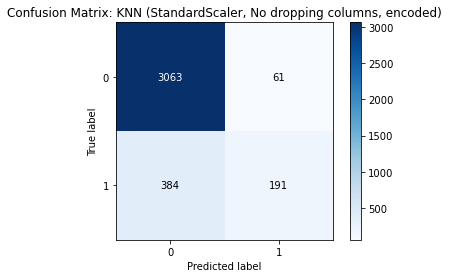

In [34]:
plot_confusion_matrix(y_true = y_test, 
                      y_pred = model_KNN_pred, 
#                       cmap = 'BrBG',         #  Choose a prefered color map
                      #normalize = True,     #  Normalize frequency as percentage (of total true instances)   
                      title = "Confusion Matrix: KNN (StandardScaler, No dropping columns, encoded)"); 

In [35]:
print('Accuracy(knn_best): {:.2f}'.format(accuracy_score(y_test, model_KNN_pred)))     
print('Precision(knn_best): {:.2f}'.format(precision_score(y_test, model_KNN_pred))) 
print('Recall(knn_best): {:.2f}'.format(recall_score(y_test, model_KNN_pred)))
print('F1(knn_best): {:.2f}'.format(f1_score(y_test, model_KNN_pred)))

Accuracy(knn_best): 0.88
Precision(knn_best): 0.76
Recall(knn_best): 0.33
F1(knn_best): 0.46


## Comparison and evaluation between the 3 models

### ROC curves & Area-Under-Curve (AUC)

In [37]:
tree_prob = model_tree.predict_proba(X_test)
logistic_prob = model_Logistic.predict_proba(X_test_scaled)  
KNN_prob = model_KNN.predict_proba(X_test_scaled)

In [38]:
from sklearn.metrics import roc_curve 
 
# Decision Tree
fpr_Tree, tpr_Tree, thresholds = roc_curve(y_true = y_test, 
                                           y_score = tree_prob[:,0],
                                           pos_label = 0)    

# Logisitc Regression
fpr_Logistic, tpr_Logistic, thresholds = roc_curve(y_true = y_test, 
                                         y_score = logistic_prob[:,0],
                                         pos_label = 0)    

# KNN
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_true = y_test, 
                                         y_score = KNN_prob[:,0],
                                         pos_label = 0)       

In [39]:
from sklearn.metrics import auc
 
auc_Tree = auc(x = fpr_Tree, y = tpr_Tree)
auc_Logistic = auc(x = fpr_Logistic, y = tpr_Logistic)
auc_KNN = auc(x = fpr_KNN, y = tpr_KNN)

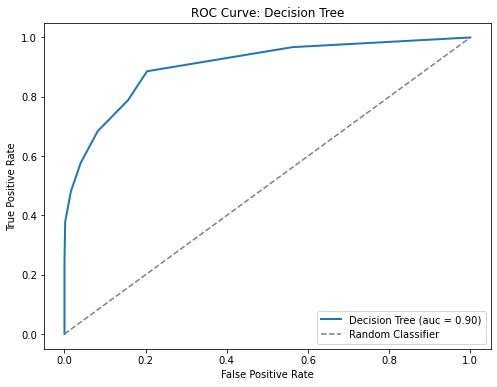

In [40]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_Tree, tpr_Tree,  lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_Tree))    # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: Decision Tree', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

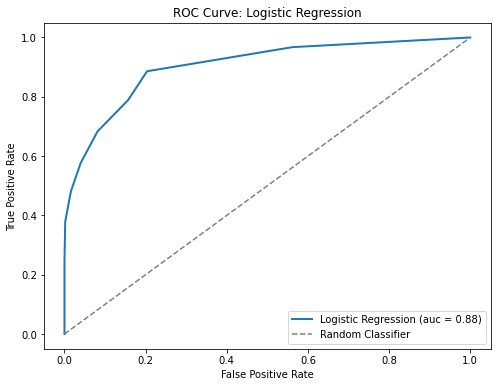

In [41]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_Tree, tpr_Tree,  lw= 2, label='Logistic Regression (auc = {:0.2f})'.format(auc_Logistic))    # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: Logistic Regression', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

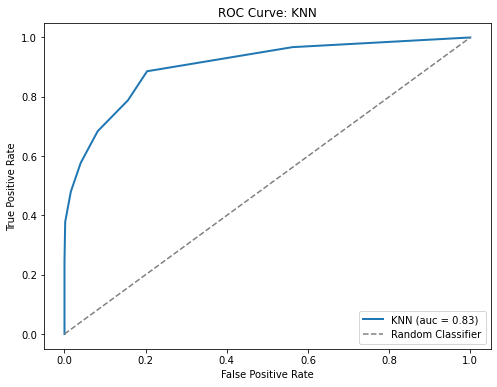

In [42]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_Tree, tpr_Tree,  lw= 2, label='KNN (auc = {:0.2f})'.format(auc_KNN))    # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: KNN', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

In [6]:
models = {'model': ['Decision Tree', 'Logistic Regression', 'KNN'], 'Accuracy': [0.89, 0.88, 0.88], 'Precision':[0.71, 0.75, 0.76], 'Recall':[0.44, 0.35, 0.33], 'F1 Score': [0.54, 0.48, 0.46], 'AUC from ROC Curve': [0.90, 0.88, 0.83]}
df_compare = pd.DataFrame(data=models)
display(df_compare)

,model,Accuracy,Precision,Recall,F1 Score,AUC from ROC Curve
0,Decision Tree,0.89,0.71,0.44,0.54,0.90
1,Logistic Regression,0.88,0.75,0.35,0.48,0.88
2,KNN,0.88,0.76,0.33,0.46,0.83
